In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.impute import KNNImputer
import pickle

In [2]:
df=pd.read_csv(r"C:\Users\kannu\OneDrive\Desktop\Pandas_csvs\Datasets\Regression_data_sets\car.csv")
df.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


### EDA

In [3]:
# nullvalues
df.isna().sum()

full_name                0
selling_price            0
new_price            10410
year                     0
seller_type              0
km_driven                0
owner_type               0
fuel_type                0
transmission_type        0
mileage                160
engine                 110
max_power              337
seats                   87
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  object
 2   new_price          9564 non-null   object
 3   year               19974 non-null  int64 
 4   seller_type        19974 non-null  object
 5   km_driven          19974 non-null  object
 6   owner_type         19974 non-null  object
 7   fuel_type          19974 non-null  object
 8   transmission_type  19974 non-null  object
 9   mileage            19814 non-null  object
 10  engine             19864 non-null  object
 11  max_power          19637 non-null  object
 12  seats              19887 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


In [5]:
#fullname

# Taking only brand name, as model can be segregated by remaining features.

df["full_name"].value_counts()

Maruti Swift Dzire VDI                 210
Maruti Alto 800 LXI                    189
Maruti Wagon R VXI                     163
Maruti Swift VDI                       150
Maruti Alto K10 VXI                    121
                                      ... 
Tata Tiago 2019-2020 XM                  1
Maruti Esteem VX - BSII                  1
Hyundai Santro Xing XL eRLX Euro II      1
Honda City i DTec E                      1
Toyota Yaris V Optional CVT BSIV         1
Name: full_name, Length: 3321, dtype: int64

In [6]:
#ourbrand name is at first place

def get_first_word(df):
    a=df.split()
    return a[0]

In [7]:
df["brand"]=df["full_name"].apply(get_first_word)

In [8]:
df["brand"]    #now we have to delete full_name coloumn in feature engineering.

0          Maruti
1         Hyundai
2         Hyundai
3          Maruti
4            Ford
           ...   
19969      Toyota
19970      Maruti
19971       Skoda
19972    Mahindra
19973       Honda
Name: brand, Length: 19974, dtype: object

In [9]:
df["full_name"].shape,df["brand"].shape


((19974,), (19974,))

In [10]:
df["brand"].value_counts().head()

Maruti      5648
Hyundai     3645
Honda       1781
Mahindra    1291
Toyota      1205
Name: brand, dtype: int64

In [11]:
#now we need to convert it into numeric column,as nominal hence will use ohe. #will do encoding of all at once in feature
# engg.


In [12]:
# checking for null values
df["brand"].isna().sum()

0

In [13]:
#selling_price

df["selling_price"].value_counts()

4.5 Lakh*      466
3.5 Lakh*      434
5.5 Lakh*      408
6.5 Lakh*      378
4 Lakh*        359
              ... 
1.17 Lakh*       1
10.64 Lakh*      1
14.72 Lakh*      1
4.27 Lakh*       1
4.56 Lakh*       1
Name: selling_price, Length: 1215, dtype: int64

In [14]:
#Here we will extract only int, the whole number will be coonverted into numerical whole, means 1.5 lack will become 150000
# and 2 crore will become 20000000.

In [15]:
df["selling_price"].head()

0     1.2 Lakh*
1     5.5 Lakh*
2    2.15 Lakh*
3    2.26 Lakh*
4     5.7 Lakh*
Name: selling_price, dtype: object

In [16]:
# Checking except lakh is there any other range.
def last_word(df):
    a=df.split()
    return a[-1]
    

df["selling_price"].loc[(df["selling_price"].apply(last_word)=="Lakh*")==False].unique()

array(['75,000*', '95,000*', '71,000*', '85,000*', '55,000*', '2.35 Cr*',
       '62,000*', '70,000*', '78,000*', '80,000*', '65,000*', '90,000*',
       '95,585*', '1.45 Cr*', '77,000*', '82,608*', '42,000*', '32,500*',
       '40,000*', '81,000*', '50,000*', '1.1 Cr*', '34,000*', '99,000*',
       '60,000*', '89,000*', '1.5 Cr*', '59,000*', '3.95 Cr*', '45,000*',
       '35,000*', '56,000*', '82,000*', '53,000*', '87,000*', '99,111*',
       '25,000*', '41,694*', '57,000*', '88,000*', '66,000*', '30,000*',
       '94,000*', '97,000*', '98,000*', '46,288*', '96,000*', '1.11 Cr*',
       '72,308*', '74,000*', '93,750*', '1.3 Cr*', '92,000*', '1.32 Cr*',
       '2.42 Cr*', '82,875*', '45,946*', '58,000*', '86,250*', '91,000*',
       '69,000*', '93,000*', '72,000*', '52,000*', '51,000*', '68,000*',
       '74,999*'], dtype=object)

In [17]:
#hence the data having lakh needs to be converted into =no*100000
#data having crore=no*10000000
#data having only nos=needs to be converted into int

In [18]:
def price_convert(df):
    a=df.split()
    if a[-1]=="Lakh*":
        val=eval(a[0])*100000
    elif a[-1]=="Cr*":
        val=eval(a[0])*10000000
    else:
        val=eval(df.replace(",","").replace("*",""))
    return val

df["selling_price_new"]=df["selling_price"].apply(price_convert) #try to store in feature to every modification.

In [19]:
df["selling_price_new"]

0         120000.0
1         550000.0
2         215000.0
3         226000.0
4         570000.0
           ...    
19969     650000.0
19970     925000.0
19971     425000.0
19972    1225000.0
19973    1200000.0
Name: selling_price_new, Length: 19974, dtype: float64

In [20]:
#cheking for null values
df["selling_price_new"].isna().sum()

0

In [21]:
##new_price 

df["new_price"]    #however it has so many null values,still cleaning this.

0                                                   NaN
1          New Car (On-Road Price) : Rs.7.11-7.48 Lakh*
2                                                   NaN
3                                                   NaN
4        New Car (On-Road Price) : Rs.10.14-13.79 Lakh*
                              ...                      
19969                                               NaN
19970                                               NaN
19971                                               NaN
19972    New Car (On-Road Price) : Rs.17.83-24.91 Lakh*
19973                                               NaN
Name: new_price, Length: 19974, dtype: object

In [22]:
len(df["new_price"].unique())

1745

In [23]:
#if i split by " " 4th index will be ruppes, each one is in lakh so need to multiply each one by 100000



In [24]:
#checking except "Lakh*" whether other scale avaliable
def fun(df):
    if type(df) !=float:
        a=df.split()
        return a[-1]
df["new_price"].loc[(df["new_price"].apply(fun)=="Lakh*")==False].value_counts().head(6)  #so we have cr also

New Car (On-Road Price) : Rs.47.62-1.60 Cr*     15
New Car (On-Road Price) : Rs.74.17-1.72 Cr*     13
New Car (On-Road Price) : Rs.1.67 Cr*           11
New Car (On-Road Price) : Rs.48.86-1.64 Cr*     11
New Car (On-Road Price) : Rs.1.64Cr-3.19 Cr*    10
New Car (On-Road Price) : Rs.1.62 Cr*            8
Name: new_price, dtype: int64

In [25]:
pattern1="\d+[.]*\d+[-]*\d*[.]*\d*\b"

In [26]:
pattern2="\d+.*\b"

In [27]:
df["new_price"].isna().sum()

10410

In [28]:
def fun_reg(df):
    import re
    if type(df) !=float:
        pattern1=r"\d+[.]*\d+[-]*\d*[.]*\d*\b"
        result=re.findall(pattern1,df)[0]
        new_value=re.split("-",result)
        if len(new_value)==2:
            first=eval(new_value[0])
            second=eval(new_value[1])
            avg=(first+second)/2
        else:
            avg=eval(new_value[0])
        end_word_pattern=r"Cr\*$|Lakh\*$"
        end_word=re.findall(end_word_pattern,df)[0]
        if end_word=="Cr*":
            price=avg*10000000
        elif end_word=="Lakh*":
            price=avg*100000
        else:
            price=avg
        return price

df["new_price_new"]=df["new_price"].apply(fun_reg)
df["new_price_new"].isna().sum()


10410

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19974 non-null  object 
 1   selling_price      19974 non-null  object 
 2   new_price          9564 non-null   object 
 3   year               19974 non-null  int64  
 4   seller_type        19974 non-null  object 
 5   km_driven          19974 non-null  object 
 6   owner_type         19974 non-null  object 
 7   fuel_type          19974 non-null  object 
 8   transmission_type  19974 non-null  object 
 9   mileage            19814 non-null  object 
 10  engine             19864 non-null  object 
 11  max_power          19637 non-null  object 
 12  seats              19887 non-null  object 
 13  brand              19974 non-null  object 
 14  selling_price_new  19974 non-null  float64
 15  new_price_new      9564 non-null   float64
dtypes: float64(2), int64(1

In [30]:
#year 
# will convert this feature into age of car, so that this feature will be useful for us.

In [31]:
df["year"].astype("int")

0        2012
1        2016
2        2010
3        2012
4        2015
         ... 
19969    2017
19970    2019
19971    2015
19972    2016
19973    2019
Name: year, Length: 19974, dtype: int32

In [32]:
df["age"]=2022-df["year"]

In [33]:
df["age"].isna().sum()

0

In [34]:
#seller_type
df["seller_type"].value_counts()

Dealer              11970
Individual           7814
Trustmark Dealer      190
Name: seller_type, dtype: int64

In [35]:
df["seller_type"].isna().sum()

0

In [36]:
#will one hot encoding 

In [37]:
#km_driven

df["km_driven"].isna().sum()

0

In [38]:
df["km_driven"].unique()

array(['1,20,000 kms', '20,000 kms', '60,000 kms', ..., '10,723 kms',
       '69,480 kms', '38,00,000 kms'], dtype=object)

In [39]:
#checking where other than kms in last.
def fun_km(df):
    import re
    end_with_pattern=r"kms$"
    result=re.findall(end_with_pattern,df)[0]
    return result

df["km_driven"].loc[(df["km_driven"].apply(fun_km)=="kms")==False]  #hence nothing is except kms in last

Series([], Name: km_driven, dtype: object)

In [40]:
# hence we need to remove , and kms from data

def km_driv(df):
    import re
    result=re.sub("[,kms ]","",df)
    return eval(result)

df["km_driven"]=df["km_driven"].apply(km_driv)

In [41]:
df["km_driven"].isna().sum()

0

In [42]:
##owner_type         
df["owner_type"].value_counts()  #only 1 feature hence deleting it
df.drop("owner_type",axis=1,inplace=True)

In [43]:
#fuel_type
df["fuel_type"].value_counts()

Diesel      9815
Petrol      9763
CNG          316
LPG           66
Electric      14
Name: fuel_type, dtype: int64

In [44]:
df["fuel_type"].isna().sum()

0

In [45]:
#one hot enconding

In [46]:
#transmission_type  

df["transmission_type"].value_counts()

Manual       16025
Automatic     3949
Name: transmission_type, dtype: int64

In [47]:
#one hot encoding

In [48]:
df["transmission_type"].isna().sum()

0

In [49]:
#mileage
df["mileage"].value_counts()

Mileage18.9 kmpl      624
Mileage18.6 kmpl      476
Mileage17.0 kmpl      444
Mileage24.3 kmpl      292
Mileage28.4 kmpl      279
                     ... 
Mileage24.07 kmpl       1
Mileage9.1 kmpl         1
Mileage20.2 kmpl        1
Mileage14.41 kmpl       1
Mileage18.15 km/kg      1
Name: mileage, Length: 561, dtype: int64

In [50]:
df["mileage"].isna().sum()

160

In [51]:
#need to handle string then will handle null values.
#checking values except kmpl

def mil(df1):
    import re
    
    if type(df1)!=float :
        pat=r"kmpl$"
        result=re.findall(pat,df1)
        if result:
            result1= result[0]
        else:
            result1=df1
        return result1
            
  

val=df["mileage"].loc[(df["mileage"].apply(mil)=="kmpl")==False].value_counts()

#so we havle km/kg,kn/hr,kmpl,nan
#1kg=1tr
# taking all equal



In [52]:
def mileag(f1):
    if type(f1) !=float:
        import re
        pattern=r"\d+[.]*\d*\b" 
        result=eval(re.findall(pattern,f1)[0])
    else:
        result=f1
    return result

df["mileage_new"]=df["mileage"].apply(mileag)
df["full_name"].loc[df["mileage_new"].isna()].value_counts().head(10)

  

Hyundai Santro Xing GL                 28
Hyundai Santro Xing XL                 23
Mercedes-Benz M-Class ML 350 4Matic    10
Ford Figo Aspire Facelift               7
Toyota Fortuner 4X2 AT                  7
Hyundai Santro Xing XP                  4
Mahindra Jeep MM 540                    4
Hyundai Santro GLS I - Euro II          4
Jeep Compass 1.4 Sport                  4
Land Rover Freelander 2 TD4 SE          4
Name: full_name, dtype: int64

In [53]:
df["mileage_new"].loc[df["full_name"]=="Hyundai Santro Xing GL"]=12.8
#checking values from net

C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3877064986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mileage_new"].loc[df["full_name"]=="Hyundai Santro Xing GL"]=12.8


In [54]:
df["mileage_new"].loc[df["full_name"]=="Hyundai Santro Xing XL"]=12
df["mileage_new"].loc[df["full_name"]=="Mercedes-Benz M-Class ML 350 4Matic"]=15.26
df["mileage_new"].loc[df["full_name"]=="Ford Figo Aspire Facelift"]=25.64
df["mileage_new"].loc[df["full_name"]=="Toyota Fortuner 4X2 AT"]=10.3
df["mileage_new"].isna().sum()

C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3053733673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mileage_new"].loc[df["full_name"]=="Hyundai Santro Xing XL"]=12
C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3053733673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mileage_new"].loc[df["full_name"]=="Mercedes-Benz M-Class ML 350 4Matic"]=15.26
C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3053733673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

85

In [55]:
df["mileage_new"].isna().sum()

85

In [56]:
df["full_name"].loc[df["mileage_new"].isna()].value_counts()

Mahindra Jeep MM 540                                     4
Hyundai Santro Xing XP                                   4
Hyundai Santro GLS I - Euro II                           4
Jeep Compass 1.4 Sport                                   4
Land Rover Freelander 2 TD4 SE                           4
Hyundai Santro DX                                        3
Hyundai Santro AT                                        3
Hyundai Santro Xing ECO                                  2
Hyundai Santro GLS II - Euro II                          2
Honda City 1.5 GXI                                       2
Hyundai Santro GS                                        2
Mercedes-Benz GLC 220d 4MATIC                            2
Mahindra E Verito D2                                     2
Mercedes-Benz GLA Class Facelift                         2
Mahindra Ingenio CRDe                                    2
Hyundai Santro LP - Euro II                              2
Mahindra Renault Logan 1.5 DLSX                         

In [57]:
df["mileage_new"].fillna(df["mileage_new"].mean(),inplace=True)

In [58]:
df["mileage_new"].isna().sum()

0

In [59]:
df["max_power"].value_counts() 

Max Power74 bhp        867
Max Power88.5 bhp      615
Max Power81.80 bhp     544
Max Power98.6 bhp      479
Max Power67.04 bhp     468
                      ... 
Max Power507 bhp         1
Max Power246 bhp         1
Max Power420 bhp         1
Max Power122.4 bhp       1
Max Power177.01 bhp      1
Name: max_power, Length: 493, dtype: int64

In [60]:
#checking whether anything else bhp
def max_power_last_word(f1):
    if type(f1) !=float:
        import re
        pattern=r"bhp$"
        result=re.findall(pattern,f1)[0]
    else:
        result=f1
    return result

df["max_power"].loc[(df["max_power"].apply(max_power_last_word)=="bhp")==False].value_counts()  #hence we dont have anthing 
# else except bhp in last



Series([], Name: max_power, dtype: int64)

In [61]:
def max_power(f1):
    if type(f1) !=float:
        pattern=r"\d+[.]*\d*"
        result=eval(re.findall(pattern,f1)[0])
    else:
        result=f1
    return result

df["max_power_new"]=df["max_power"].apply(max_power)

In [62]:
df["max_power_new"].isna().sum()

337

In [63]:
res=df.loc[df["max_power_new"].isna()].groupby("full_name")
for i in res.groups:
    if len(res.groups[i])>5:
        print(i)


BMW 5 Series 520d Sedan
BMW X1 sDrive 20D xLine
Fiat Punto 1.3 Emotion
Hyundai Santro Xing XL
Hyundai Santro Xing XL eRLX Euro III
Hyundai Santro Xing XO
Maruti Estilo LXI
Maruti Swift 1.3 LXI
Maruti Swift 1.3 VXi
Maruti Swift VDI BSIV
Toyota Etios GD
Toyota Etios Liva G
Toyota Etios Liva GD
Toyota Etios V


In [64]:
df["max_power"].loc[df["full_name"]=="Maruti Swift VDI BSIV"]

18       Max Power74 bhp
53                   NaN
134      Max Power74 bhp
603                  NaN
823      Max Power74 bhp
              ...       
19283                NaN
19483                NaN
19545    Max Power74 bhp
19692                NaN
19921    Max Power74 bhp
Name: max_power, Length: 112, dtype: object

In [65]:
df.loc[df["full_name"]=="Maruti Estilo LXI"]

,full_name,selling_price,new_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,brand,selling_price_new,new_price_new,age,mileage_new,max_power_new
960,Maruti Estilo LXI,1.6 Lakh*,NaN,2010,Individual,60000,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,160000.0,NaN,12,19.5,NaN
3115,Maruti Estilo LXI,1.2 Lakh*,NaN,2009,Individual,100000,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,120000.0,NaN,13,19.5,NaN
4090,Maruti Estilo LXI,1.8 Lakh*,NaN,2009,Individual,30000,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,180000.0,NaN,13,19.5,NaN
9870,Maruti Estilo LXI,1.7 Lakh*,NaN,2010,Individual,35000,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,170000.0,NaN,12,19.5,NaN
11179,Maruti Estilo LXI,1 Lakh*,NaN,2009,Individual,70000,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,100000.0,NaN,13,19.5,NaN
11254,Maruti Estilo LXI,1.5 Lakh*,NaN,2010,Individual,60000,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,150000.0,NaN,12,19.5,NaN
11463,Maruti Estilo LXI,1.7 Lakh*,NaN,2009,Individual,109623,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,170000.0,NaN,13,19.5,NaN
11572,Maruti Estilo LXI,1.7 Lakh*,NaN,2010,Individual,60000,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,170000.0,NaN,12,19.5,NaN
11900,Maruti Estilo LXI,1.8 Lakh*,NaN,2010,Individual,15000,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,180000.0,NaN,12,19.5,NaN
12918,Maruti Estilo LXI,1.65 Lakh*,NaN,2010,Dealer,52028,Petrol,Manual,Mileage19.5 kmpl,Engine1061 CC,NaN,NaN,Maruti,165000.0,NaN,12,19.5,NaN


In [66]:
df.groupby("full_name").get_group("Hyundai Santro Xing XL")

,full_name,selling_price,new_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,brand,selling_price_new,new_price_new,age,mileage_new,max_power_new
351,Hyundai Santro Xing XL,1.15 Lakh*,NaN,2005,Individual,120000,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,115000.0,NaN,17,12.0,NaN
2553,Hyundai Santro Xing XL,"95,000*",NaN,2006,Individual,30000,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,95000.0,NaN,16,12.0,NaN
4873,Hyundai Santro Xing XL,1.25 Lakh*,NaN,2007,Dealer,88571,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,125000.0,NaN,15,12.0,NaN
4925,Hyundai Santro Xing XL,"90,000*",NaN,2006,Individual,120000,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,90000.0,NaN,16,12.0,NaN
5437,Hyundai Santro Xing XL,1 Lakh*,NaN,2006,Individual,80000,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,100000.0,NaN,16,12.0,NaN
6295,Hyundai Santro Xing XL,1.3 Lakh*,NaN,2006,Individual,80000,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,130000.0,NaN,16,12.0,NaN
7984,Hyundai Santro Xing XL,2.35 Lakh*,NaN,2007,Individual,10900,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,235000.0,NaN,15,12.0,NaN
8900,Hyundai Santro Xing XL,1.2 Lakh*,NaN,2006,Dealer,78523,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,120000.0,NaN,16,12.0,NaN
9602,Hyundai Santro Xing XL,"25,000*",NaN,2006,Dealer,71238,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,25000.0,NaN,16,12.0,NaN
9864,Hyundai Santro Xing XL,"65,000*",NaN,2006,Individual,80000,Petrol,Manual,NaN,Engine1086 CC,NaN,Seats5,Hyundai,65000.0,NaN,16,12.0,NaN


In [67]:
df["max_power_new"].loc[df["full_name"]=="Maruti Swift VDI BSIV"]=74

C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\544710047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["max_power_new"].loc[df["full_name"]=="Maruti Swift VDI BSIV"]=74


In [68]:
df["max_power_new"].loc[df["full_name"]=="Hyundai Santro LP"]=59.17
df["max_power_new"].loc[df["full_name"]=="Hyundai Santro AT"]=59.17
df["max_power_new"].loc[df["full_name"]=="Hyundai Santro Xing XL"]=63
df["max_power_new"].loc[df["full_name"]=="BMW 5 Series 520d Sedan"]=188
df["max_power_new"].loc[df["full_name"]=="Maruti Estilo LXI"]=67
df["max_power_new"].loc[df["full_name"]=="Toyota Etios GD"]=67.04
df["max_power_new"].loc[df["full_name"]=="Toyota Etios Liva G"]=78.9
df["max_power_new"].loc[df["full_name"]=="Toyota Etios Liva GD"]=67.04



C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3537078979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["max_power_new"].loc[df["full_name"]=="Hyundai Santro LP"]=59.17
C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3537078979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["max_power_new"].loc[df["full_name"]=="Hyundai Santro AT"]=59.17
C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3537078979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [69]:
df["max_power_new"].fillna(df["max_power_new"].median(),inplace=True)

<AxesSubplot:xlabel='max_power_new', ylabel='Density'>

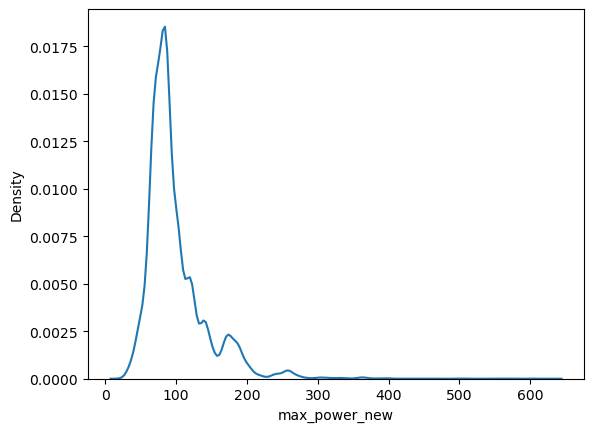

In [70]:
sns.kdeplot(df["max_power_new"])

In [71]:
df["max_power_new"].isna().sum()

0

In [72]:
#seats
df["seats"].value_counts()

Seats5     16585
Seats7      2370
Seats8       443
Seats4       225
Seats6       143
Seats9        72
Seats10       26
Seats2        21
Seats14        2
Name: seats, dtype: int64

In [73]:
df["seats"].isna().sum()

87

In [74]:
list1=list(df.loc[df["seats"].isna()].groupby("full_name").groups.keys())

In [75]:
for seat in list1:
    print(seat,"\n",df["seats"].loc[df["full_name"]==seat])

Audi A4 2008-2014 3.0 TDI Quattro 
 875     NaN
7083    NaN
Name: seats, dtype: object
BMW X1 sDrive 20D xLine 
 3845     NaN
3865     NaN
5255     NaN
8990     NaN
14751    NaN
19213    NaN
Name: seats, dtype: object
Fiat Punto 1.2 Dynamic 
 2445    NaN
2566    NaN
5926    NaN
Name: seats, dtype: object
Fiat Punto 1.3 Active 
 963      Seats5
3129        NaN
8495        NaN
9212        NaN
14468       NaN
16673       NaN
Name: seats, dtype: object
Fiat Punto 1.3 Emotion 
 3216     NaN
3369     NaN
4454     NaN
7895     NaN
10852    NaN
13261    NaN
Name: seats, dtype: object
Fiat Punto 1.4 Emotion 
 3784    NaN
Name: seats, dtype: object
Ford Endeavour Hurricane LE 
 9937    NaN
Name: seats, dtype: object
Ford Figo Aspire Facelift 
 304      NaN
2759     NaN
3554     NaN
10737    NaN
11415    NaN
15982    NaN
16957    NaN
Name: seats, dtype: object
Ford Figo Diesel 
 17081    NaN
Name: seats, dtype: object
Honda City 1.3 DX 
 11337       NaN
17665    Seats5
Name: seats, dtype: object


In [76]:
df["seats"].loc[df["full_name"].isin (['Audi A4 2008-2014 3.0 TDI Quattro','BMW X1 sDrive 20D xLine','Fiat Punto 1.2 Dynamic','Fiat Punto 1.3 Active','Fiat Punto 1.3 Emotion','Fiat Punto 1.4 Emotion','Honda City 1.3 DX','Honda City 1.5 EXI'])]="Seats5"

C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\796157647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seats"].loc[df["full_name"].isin (['Audi A4 2008-2014 3.0 TDI Quattro','BMW X1 sDrive 20D xLine','Fiat Punto 1.2 Dynamic','Fiat Punto 1.3 Active','Fiat Punto 1.3 Emotion','Fiat Punto 1.4 Emotion','Honda City 1.3 DX','Honda City 1.5 EXI'])]="Seats5"


In [77]:
df["seats"].loc[df["full_name"]=="Maruti Omni E 8 Str STD"]="Seats8"

C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3344815205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seats"].loc[df["full_name"]=="Maruti Omni E 8 Str STD"]="Seats8"


In [78]:
df["seats"].isna().sum()

59

In [79]:
list2=list(df.loc[df["seats"].isna()].groupby("full_name").groups.keys())

In [80]:
for seat in list2:
    print(seat,"\n",df["seats"].loc[df["full_name"]==seat])

Ford Endeavour Hurricane LE 
 9937    NaN
Name: seats, dtype: object
Ford Figo Aspire Facelift 
 304      NaN
2759     NaN
3554     NaN
10737    NaN
11415    NaN
15982    NaN
16957    NaN
Name: seats, dtype: object
Ford Figo Diesel 
 17081    NaN
Name: seats, dtype: object
Honda Jazz Select Edition 
 1201    NaN
9507    NaN
Name: seats, dtype: object
Maruti Estilo LXI 
 960      NaN
3115     NaN
4090     NaN
9870     NaN
11179    NaN
11254    NaN
11463    NaN
11572    NaN
11900    NaN
12918    NaN
15254    NaN
18593    NaN
18837    NaN
Name: seats, dtype: object
Maruti Swift 1.3 LXI 
 2803     NaN
4440     NaN
9456     NaN
13065    NaN
13504    NaN
14072    NaN
17564    NaN
Name: seats, dtype: object
Maruti Swift 1.3 VXI ABS 
 4575    NaN
6377    NaN
9544    NaN
Name: seats, dtype: object
Maruti Swift 1.3 VXi 
 1060     NaN
2489     NaN
3406     NaN
4483     NaN
4747     NaN
5257     NaN
6233     NaN
6356     NaN
7333     NaN
7383     NaN
8103     NaN
8625     NaN
9626     NaN
9711    

In [81]:
list2

['Ford Endeavour Hurricane LE',
 'Ford Figo Aspire Facelift',
 'Ford Figo Diesel',
 'Honda Jazz Select Edition',
 'Maruti Estilo LXI',
 'Maruti Swift 1.3 LXI',
 'Maruti Swift 1.3 VXI ABS',
 'Maruti Swift 1.3 VXi',
 'Maruti Swift 1.3 ZXI',
 'Nissan Infiniti Petrol',
 'Nissan Kicks Diesel']

In [82]:
l2=[
 'Ford Figo Aspire Facelift',
 'Ford Figo Diesel',
 'Honda Jazz Select Edition',
 'Maruti Estilo LXI',
 'Maruti Swift 1.3 LXI',
 'Maruti Swift 1.3 VXI ABS',
 'Maruti Swift 1.3 VXi',
 'Maruti Swift 1.3 ZXI',
 'Nissan Kicks Diesel']

df["seats"].loc[df["full_name"].isin(l2)]="Seats5"

C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\1868728200.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seats"].loc[df["full_name"].isin(l2)]="Seats5"


In [83]:
df["seats"].loc[df["full_name"]=='Ford Endeavour Hurricane LE']="Seats7"
df["seats"].loc[df["full_name"]=='Nissan Infiniti Petrol']="Seats7"

C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3708434814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seats"].loc[df["full_name"]=='Ford Endeavour Hurricane LE']="Seats7"
C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3708434814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seats"].loc[df["full_name"]=='Nissan Infiniti Petrol']="Seats7"


In [84]:
df["seats"].value_counts()

Seats5     16667
Seats7      2372
Seats8       446
Seats4       225
Seats6       143
Seats9        72
Seats10       26
Seats2        21
Seats14        2
Name: seats, dtype: int64

In [85]:
df["seats"].isna().sum()

0

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19974 non-null  object 
 1   selling_price      19974 non-null  object 
 2   new_price          9564 non-null   object 
 3   year               19974 non-null  int64  
 4   seller_type        19974 non-null  object 
 5   km_driven          19974 non-null  int64  
 6   fuel_type          19974 non-null  object 
 7   transmission_type  19974 non-null  object 
 8   mileage            19814 non-null  object 
 9   engine             19864 non-null  object 
 10  max_power          19637 non-null  object 
 11  seats              19974 non-null  object 
 12  brand              19974 non-null  object 
 13  selling_price_new  19974 non-null  float64
 14  new_price_new      9564 non-null   float64
 15  age                19974 non-null  int64  
 16  mileage_new        199

In [87]:
df.isna().sum()

full_name                0
selling_price            0
new_price            10410
year                     0
seller_type              0
km_driven                0
fuel_type                0
transmission_type        0
mileage                160
engine                 110
max_power              337
seats                    0
brand                    0
selling_price_new        0
new_price_new        10410
age                      0
mileage_new              0
max_power_new            0
dtype: int64

In [88]:
#engine
df["engine"].value_counts()

Engine1197 CC    2662
Engine1248 CC    2159
Engine998 CC     1303
Engine1498 CC    1253
Engine1497 CC     718
                 ... 
Engine5204 CC       1
Engine970 CC        1
Engine1489 CC       1
Engine1330 CC       1
Engine2596 CC       1
Name: engine, Length: 169, dtype: int64

In [89]:
list3=list(df.loc[df["engine"].isna()].groupby("full_name").groups.keys())

In [90]:
list3

['Audi A4 2008-2014 3.0 TDI Quattro',
 'BMW 5 Series 520d Sedan',
 'BMW X1 sDrive 20D xLine',
 'BMW X3 2.0d SAV',
 'Fiat Punto 1.2 Dynamic',
 'Fiat Punto 1.3 Active',
 'Fiat Punto 1.3 Emotion',
 'Fiat Punto 1.4 Emotion',
 'Honda CR-V AT With Sun Roof',
 'Honda City 1.3 DX',
 'Honda City 1.5 EX-S',
 'Honda City 1.5 GXI',
 'Honda Jazz Select Edition',
 'Hyundai Kona Premium',
 'Hyundai Santro 2018 New',
 'Hyundai Santro GLS II - Euro II',
 'Hyundai Santro LS',
 'Hyundai Santro Xing XG',
 'Mahindra e2o Premium',
 'Mahindra e2o T2',
 'Mahindra e2oPlus P6',
 'Maruti Omni BSIII 8-STR W/ IMMOBILISER',
 'Maruti Omni E 8 Str STD',
 'Maruti Omni LPG STD BSIII 5-STR W IMMOBILISER',
 'Maruti Omni LPG STD BSIV',
 'Maruti Swift 1.3 LXI',
 'Maruti Swift 1.3 VXI ABS',
 'Maruti Swift 1.3 VXi',
 'Maruti Swift 1.3 ZXI',
 'Mercedes-Benz C-Class 180 Classic',
 'Mercedes-Benz E-Class 220 petrol',
 'Nissan Infiniti Petrol',
 'Skoda Laura 1.8 TSI Ambition',
 'Tata Nexon EV XM',
 'Tata Tigor EV XM',
 'Toyota E

In [91]:
for eng in list3:
    print(eng,"\n",df["engine"].loc[df["full_name"]==eng])

Audi A4 2008-2014 3.0 TDI Quattro 
 875     NaN
7083    NaN
Name: engine, dtype: object
BMW 5 Series 520d Sedan 
 716      NaN
2456     NaN
4228     NaN
4397     NaN
4683     NaN
4762     NaN
5248     NaN
5267     NaN
7801     NaN
10719    NaN
12209    NaN
14820    NaN
14947    NaN
15123    NaN
19030    NaN
Name: engine, dtype: object
BMW X1 sDrive 20D xLine 
 3845     NaN
3865     NaN
5255     NaN
8990     NaN
14751    NaN
19213    NaN
Name: engine, dtype: object
BMW X3 2.0d SAV 
 1596    NaN
4389    NaN
Name: engine, dtype: object
Fiat Punto 1.2 Dynamic 
 2445    NaN
2566    NaN
5926    NaN
Name: engine, dtype: object
Fiat Punto 1.3 Active 
 963      Engine1248 CC
3129               NaN
8495               NaN
9212               NaN
14468              NaN
16673              NaN
Name: engine, dtype: object
Fiat Punto 1.3 Emotion 
 3216     NaN
3369     NaN
4454     NaN
7895     NaN
10852    NaN
13261    NaN
Name: engine, dtype: object
Fiat Punto 1.4 Emotion 
 3784    NaN
Name: engine, 

In [92]:
df["engine"].loc[df["full_name"]=="Fiat Punto 1.3 Active"]=1248
df["engine"].loc[df["full_name"]=="Honda City 1.3 DX"]=1298
df["engine"].loc[df["full_name"]=="Honda City 1.5 GXI"]=1493
df["engine"].loc[df["full_name"]=="Maruti Omni E 8 Str STD"]=796
df["engine"].loc[df["full_name"]=="Toyota Etios GD SP"]=1364
df["engine"].loc[df["full_name"]=="Toyota Etios Liva V"]=1197



C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3174063740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["engine"].loc[df["full_name"]=="Fiat Punto 1.3 Active"]=1248
C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3174063740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["engine"].loc[df["full_name"]=="Honda City 1.3 DX"]=1298
C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\3174063740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [93]:
df["engine"].isna().sum()

97

In [94]:
#checking remaining null in engine feature,needs to fill from net
list4=list(df.loc[df["engine"].isna()].groupby("full_name").groups.keys())
list4

['Audi A4 2008-2014 3.0 TDI Quattro',
 'BMW 5 Series 520d Sedan',
 'BMW X1 sDrive 20D xLine',
 'BMW X3 2.0d SAV',
 'Fiat Punto 1.2 Dynamic',
 'Fiat Punto 1.3 Emotion',
 'Fiat Punto 1.4 Emotion',
 'Honda CR-V AT With Sun Roof',
 'Honda City 1.5 EX-S',
 'Honda Jazz Select Edition',
 'Hyundai Kona Premium',
 'Hyundai Santro 2018 New',
 'Hyundai Santro GLS II - Euro II',
 'Hyundai Santro LS',
 'Hyundai Santro Xing XG',
 'Mahindra e2o Premium',
 'Mahindra e2o T2',
 'Mahindra e2oPlus P6',
 'Maruti Omni BSIII 8-STR W/ IMMOBILISER',
 'Maruti Omni LPG STD BSIII 5-STR W IMMOBILISER',
 'Maruti Omni LPG STD BSIV',
 'Maruti Swift 1.3 LXI',
 'Maruti Swift 1.3 VXI ABS',
 'Maruti Swift 1.3 VXi',
 'Maruti Swift 1.3 ZXI',
 'Mercedes-Benz C-Class 180 Classic',
 'Mercedes-Benz E-Class 220 petrol',
 'Nissan Infiniti Petrol',
 'Skoda Laura 1.8 TSI Ambition',
 'Tata Nexon EV XM',
 'Tata Tigor EV XM',
 'Toyota Etios Liva GD SP']

In [95]:
dict1={'Audi A4 2008-2014 3.0 TDI Quattro':2967,
 'BMW 5 Series 520d Sedan':1995,
 'BMW X1 sDrive 20D xLine':1995,
 'BMW X3 2.0d SAV':2996,
 'Fiat Punto 1.2 Dynamic':1172,
 'Fiat Punto 1.3 Emotion':1248,
 'Fiat Punto 1.4 Emotion':1368,
 'Honda CR-V AT With Sun Roof':2354,
 'Honda City 1.5 EX-S':1498,
 'Honda Jazz Select Edition':1198,
 'Hyundai Kona Premium':0,
 'Hyundai Santro 2018 New':1086,
 'Hyundai Santro GLS II - Euro II':1086,
 'Hyundai Santro LS':1086,
 'Hyundai Santro Xing XG':1086,
 'Mahindra e2o Premium':0,
 'Mahindra e2o T2':0,
 'Mahindra e2oPlus P6':0,
 'Maruti Omni BSIII 8-STR W/ IMMOBILISER':796,
 'Maruti Omni LPG STD BSIII 5-STR W IMMOBILISER':796,
 'Maruti Omni LPG STD BSIV':796,
 'Maruti Swift 1.3 LXI':796,
 'Maruti Swift 1.3 VXI ABS':1197,
 'Maruti Swift 1.3 VXi':1197,
 'Maruti Swift 1.3 ZXI':1298,
 'Mercedes-Benz C-Class 180 Classic':1998,
 'Mercedes-Benz E-Class 220 petrol':1991,
 'Nissan Infiniti Petrol':1595,
 'Skoda Laura 1.8 TSI Ambition':1798,
 'Tata Nexon EV XM':624,
 'Tata Tigor EV XM':1199,
 'Toyota Etios Liva GD SP':1364}

In [96]:
for key,value in dict1.items():
    df["engine"].loc[df["full_name"]==key]=value

C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\1467800427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["engine"].loc[df["full_name"]==key]=value


In [97]:
df["engine"]

0         Engine796 CC
1        Engine1197 CC
2        Engine1197 CC
3         Engine998 CC
4        Engine1498 CC
             ...      
19969    Engine1364 CC
19970    Engine1373 CC
19971    Engine1498 CC
19972    Engine2179 CC
19973    Engine1497 CC
Name: engine, Length: 19974, dtype: object

In [98]:

def fun_engine(f1):
    if type(f1)==str:
        pattern=r"\d+"
        result=eval(re.findall(pattern,f1)[0])
    else:
        result=f1
    return result

df["engine_new"]=df["engine"].apply(fun_engine)

In [99]:
df["engine_new"].isna().sum()

0

In [100]:
#feature selection
df.info()
del_col=["full_name","selling_price","year","new_price","engine","max_power","new_price_new","mileage"]
new_df=df.drop(del_col,axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19974 non-null  object 
 1   selling_price      19974 non-null  object 
 2   new_price          9564 non-null   object 
 3   year               19974 non-null  int64  
 4   seller_type        19974 non-null  object 
 5   km_driven          19974 non-null  int64  
 6   fuel_type          19974 non-null  object 
 7   transmission_type  19974 non-null  object 
 8   mileage            19814 non-null  object 
 9   engine             19974 non-null  object 
 10  max_power          19637 non-null  object 
 11  seats              19974 non-null  object 
 12  brand              19974 non-null  object 
 13  selling_price_new  19974 non-null  float64
 14  new_price_new      9564 non-null   float64
 15  age                19974 non-null  int64  
 16  mileage_new        199

In [101]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller_type        19974 non-null  object 
 1   km_driven          19974 non-null  int64  
 2   fuel_type          19974 non-null  object 
 3   transmission_type  19974 non-null  object 
 4   seats              19974 non-null  object 
 5   brand              19974 non-null  object 
 6   selling_price_new  19974 non-null  float64
 7   age                19974 non-null  int64  
 8   mileage_new        19974 non-null  float64
 9   max_power_new      19974 non-null  float64
 10  engine_new         19974 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.7+ MB


In [102]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller_type        19974 non-null  object 
 1   km_driven          19974 non-null  int64  
 2   fuel_type          19974 non-null  object 
 3   transmission_type  19974 non-null  object 
 4   seats              19974 non-null  object 
 5   brand              19974 non-null  object 
 6   selling_price_new  19974 non-null  float64
 7   age                19974 non-null  int64  
 8   mileage_new        19974 non-null  float64
 9   max_power_new      19974 non-null  float64
 10  engine_new         19974 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.7+ MB


In [103]:
df["seller_type"]   #--nominal
df["fuel_type"].value_counts() #nominal
df["transmission_type"].value_counts()  #nominal
df["seats"].value_counts() #ordinal
df["brand"].value_counts()#nominal #pick values having freq more than 100


print()
df["seats"].value_counts()

Seats5     16667
Seats7      2372
Seats8       446
Seats4       225
Seats6       143
Seats9        72
Seats10       26
Seats2        21
Seats14        2
Name: seats, dtype: int64

In [104]:
#brand having more than 100 freq
s1=new_df["brand"].value_counts()
top_100_freq_brand=list(s1[s1>=100].index)


In [105]:
new_df["brand"].loc[new_df["brand"].isin(top_100_freq_brand)==False]="Common"

C:\Users\kannu\AppData\Local\Temp\ipykernel_11084\1545025105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["brand"].loc[new_df["brand"].isin(top_100_freq_brand)==False]="Common"


In [106]:
new_df["brand"].value_counts()

Maruti           5648
Hyundai          3645
Honda            1781
Mahindra         1291
Toyota           1205
Tata              975
Ford              908
Volkswagen        762
Renault           636
Mercedes-Benz     501
BMW               483
Skoda             421
Common            415
Chevrolet         406
Audi              324
Nissan            289
Datsun            170
Fiat              114
Name: brand, dtype: int64

In [107]:
new_df.columns

Index(['seller_type', 'km_driven', 'fuel_type', 'transmission_type', 'seats',
       'brand', 'selling_price_new', 'age', 'mileage_new', 'max_power_new',
       'engine_new'],
      dtype='object')

In [108]:
x=new_df.drop("selling_price_new",axis=1)
y=new_df["selling_price_new"]

In [109]:
oe=OrdinalEncoder(categories=[["Seats2","Seats4","Seats5","Seats6","Seats7","Seats8","Seats9","Seats10","Seats14"]],dtype="int")
ohe=OneHotEncoder(drop="first",sparse=False,dtype="int")

In [110]:
transformer=ColumnTransformer(transformers=[("ohe",ohe,["seller_type","fuel_type","transmission_type","brand"]),("oe",oe,["seats"])],remainder="passthrough")

In [111]:
x_array=transformer.fit_transform(x)

In [112]:
x_new=pd.DataFrame(x_array)
x_new.columns=transformer.get_feature_names_out()
x_new

,ohe__seller_type_Individual,ohe__seller_type_Trustmark Dealer,ohe__fuel_type_Diesel,ohe__fuel_type_Electric,ohe__fuel_type_LPG,ohe__fuel_type_Petrol,ohe__transmission_type_Manual,ohe__brand_BMW,ohe__brand_Chevrolet,ohe__brand_Common,...,ohe__brand_Skoda,ohe__brand_Tata,ohe__brand_Toyota,ohe__brand_Volkswagen,oe__seats,remainder__km_driven,remainder__age,remainder__mileage_new,remainder__max_power_new,remainder__engine_new
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,120000.0,10.0,19.70,46.30,796.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,20000.0,6.0,18.90,82.00,1197.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,60000.0,12.0,17.00,80.00,1197.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,37000.0,10.0,20.92,67.10,998.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,30000.0,7.0,22.77,98.59,1498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,69480.0,5.0,23.59,67.05,1364.0
19970,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,18000.0,3.0,17.50,91.10,1373.0
19971,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,67000.0,7.0,21.14,103.52,1498.0
19972,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,3800000.0,6.0,16.00,140.00,2179.0


In [113]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.2,random_state=5)

In [114]:
###LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [115]:
def metrics(model):
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    mse_train=mean_squared_error(y_train,y_train_pred)
    mse_test=mean_squared_error(y_test,y_test_pred)
    mae_train=mean_absolute_error(y_train,y_train_pred)
    mae_test=mean_absolute_error(y_test,y_test_pred)
    r2_score_train=r2_score(y_train,y_train_pred)
    r2_score_test=r2_score(y_test,y_test_pred)
    print(f"{mse_train=}")
    print(f"{mse_test=}")
    print(f"{mae_train=}")
    print(f"{mae_test=}")
    print(f"{r2_score_train=}")
    print(f"{r2_score_test=}")
    return "Done"
         

In [116]:
metrics(lin_reg)

mse_train=301191361063.6918
mse_test=199891578346.13843
mae_train=245166.7527295696
mae_test=240060.8220372161
r2_score_train=0.6512724403304682
r2_score_test=0.7099597967644231


'Done'

In [117]:
#low bias

In [118]:
#not using knn because it will take time during prediction due to large dataset.{bcs it works during prediction only}

In [127]:
dt_reg=DecisionTreeRegressor()
hyp={   "criterion":['squared_error','absolute_error'],
        "max_depth":np.arange(3,8),
        "min_samples_split":np.arange(4,8),
        "min_samples_leaf":np.arange(3,8),
         "random_state":[25]
    }

rscv=RandomizedSearchCV(dt_reg,hyp,cv=5)
rscv.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
dt_reg_new=rscv.best_estimator_
dt_reg_new.fit(x_train,y_train)

In [ ]:
metrics(dt_reg_new)  #variance is low but bias is high--underfit model

In [ ]:
rf_reg=RandomForestRegressor(random_state=25,n_estimators=120,max_depth=10)
rf_reg.fit(x_train,y_train)

In [ ]:
metrics(rf_reg)  #better but variance is lil high

In [ ]:

aboost=AdaBoostRegressor(random_state=25)
aboost.fit(x_train,y_train)

In [ ]:
metrics(aboost)

In [ ]:
# hence our best option is rf_reg
with open ("model_car.pkl","wb") as file:
    pickle.dump(rf_reg,file)
    
with open ("transformer.pkl","wb") as file:
    pickle.dump(transformer,file)

In [128]:
new_df.columns


Index(['seller_type', 'km_driven', 'fuel_type', 'transmission_type', 'seats',
       'brand', 'selling_price_new', 'age', 'mileage_new', 'max_power_new',
       'engine_new'],
      dtype='object')

In [138]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller_type        19974 non-null  object 
 1   km_driven          19974 non-null  int64  
 2   fuel_type          19974 non-null  object 
 3   transmission_type  19974 non-null  object 
 4   seats              19974 non-null  object 
 5   brand              19974 non-null  object 
 6   selling_price_new  19974 non-null  float64
 7   age                19974 non-null  int64  
 8   mileage_new        19974 non-null  float64
 9   max_power_new      19974 non-null  float64
 10  engine_new         19974 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.7+ MB


In [ ]:
input=km_driven


In [130]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [137]:
for i in df["brand"].unique():
          print(f" <option value='{i}'>{i}</option>")
            

 <option value='Maruti'>Maruti</option>
 <option value='Hyundai'>Hyundai</option>
 <option value='Ford'>Ford</option>
 <option value='Mahindra'>Mahindra</option>
 <option value='Tata'>Tata</option>
 <option value='Renault'>Renault</option>
 <option value='Nissan'>Nissan</option>
 <option value='Mini'>Mini</option>
 <option value='Mercedes-Benz'>Mercedes-Benz</option>
 <option value='Toyota'>Toyota</option>
 <option value='Fiat'>Fiat</option>
 <option value='Volkswagen'>Volkswagen</option>
 <option value='Honda'>Honda</option>
 <option value='Chevrolet'>Chevrolet</option>
 <option value='Ambassador'>Ambassador</option>
 <option value='Datsun'>Datsun</option>
 <option value='Kia'>Kia</option>
 <option value='BMW'>BMW</option>
 <option value='Mitsubishi'>Mitsubishi</option>
 <option value='Audi'>Audi</option>
 <option value='Skoda'>Skoda</option>
 <option value='Land'>Land</option>
 <option value='Jaguar'>Jaguar</option>
 <option value='Daewoo'>Daewoo</option>
 <option value='Bentley'>Ben

In [160]:
new_df.columns

Index(['seller_type', 'km_driven', 'fuel_type', 'transmission_type', 'seats',
       'brand', 'selling_price_new', 'age', 'mileage_new', 'max_power_new',
       'engine_new'],
      dtype='object')

In [167]:
new_df["max_power_new"].dtype

dtype('float64')

In [169]:
[i for i in new_df.columns if new_df[i].dtype =="int64" or new_df[i].dtype =="float64"]

['km_driven',
 'selling_price_new',
 'age',
 'mileage_new',
 'max_power_new',
 'engine_new']

In [170]:
a=['km_driven',
 'age',
 'mileage_new',
 'max_power_new',
 'engine_new']

for i in a:
   print(f"<label>{i}: </label>")
   print(f"<input type='text' name='{i}'>")

<label>km_driven: </label>
<input type='text' name='km_driven'>
<label>age: </label>
<input type='text' name='age'>
<label>mileage_new: </label>
<input type='text' name='mileage_new'>
<label>max_power_new: </label>
<input type='text' name='max_power_new'>
<label>engine_new: </label>
<input type='text' name='engine_new'>


In [171]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller_type        19974 non-null  object 
 1   km_driven          19974 non-null  int64  
 2   fuel_type          19974 non-null  object 
 3   transmission_type  19974 non-null  object 
 4   seats              19974 non-null  object 
 5   brand              19974 non-null  object 
 6   selling_price_new  19974 non-null  float64
 7   age                19974 non-null  int64  
 8   mileage_new        19974 non-null  float64
 9   max_power_new      19974 non-null  float64
 10  engine_new         19974 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.7+ MB


In [172]:
df["mileage_new"]

0        19.70
1        18.90
2        17.00
3        20.92
4        22.77
         ...  
19969    23.59
19970    17.50
19971    21.14
19972    16.00
19973    18.00
Name: mileage_new, Length: 19974, dtype: float64

In [174]:
result=[454454.45454]
result=str(result[0])
pattern=r"\d+"
result=re.findall(pattern,result)[0]
result

'454454'

In [186]:
df



,full_name,selling_price,new_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,brand,selling_price_new,new_price_new,age,mileage_new,max_power_new,engine_new
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,120000,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,Maruti,120000.0,NaN,10,19.70,46.30,796
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,Hyundai,550000.0,729500.0,6,18.90,82.00,1197
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,60000,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,Hyundai,215000.0,NaN,12,17.00,80.00,1197
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,37000,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,Maruti,226000.0,NaN,10,20.92,67.10,998
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,Ford,570000.0,1196500.0,7,22.77,98.59,1498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios 1.4 GXD,6.5 Lakh*,NaN,2017,Dealer,69480,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5,Toyota,650000.0,NaN,5,23.59,67.05,1364
19970,Maruti Ertiga BSIV VXI,9.25 Lakh*,NaN,2019,Dealer,18000,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7,Maruti,925000.0,NaN,3,17.50,91.10,1373
19971,Skoda Rapid 1.5 TDI Elegance,4.25 Lakh*,NaN,2015,Dealer,67000,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5,Skoda,425000.0,NaN,7,21.14,103.52,1498
19972,Mahindra XUV500 W6 2WD,12.25 Lakh*,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016,Dealer,3800000,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7,Mahindra,1225000.0,2137000.0,6,16.00,140.00,2179
